# Spam Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-06-11 21:08:21--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: 'spam.csv.1'

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-06-11 21:08:24 (11.0 MB/s) - 'spam.csv.1' saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') 

### USE THIS wHEN YOURE WORKING WITH TEXT WITH INVALID CHARACTERS OR YOU'LL GET ERROR
## EMOJIS SIGNS SYMBOLS

In [4]:
df.head()

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

The drop() function in pandas allows you to remove specified rows or columns from a DataFrame. The axis parameter determines whether you want to drop rows (axis=0) or columns (axis=1).

In [6]:
df.head()

,ï»¿v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['labels', 'data']

<AxesSubplot:>

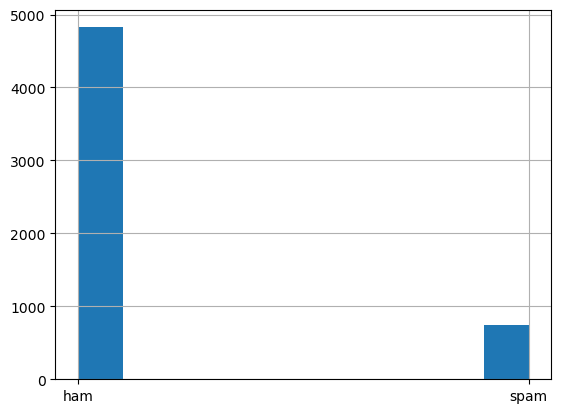

In [8]:
df['labels'].hist() ####SEE IMBALANCES

In [12]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

#converted the dataframe to an array
Y.shape

(5572,)

In [13]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)

### the default test_size is 0.25

In [14]:
# try multiple ways of calculating features
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

Using 'ignore' can be useful when you have text data with potential decoding errors, and you prefer to continue processing the remaining valid parts of the text instead of raising an error and halting the vectorization process. However, keep in mind that ignoring decoding errors may result in loss of information or altered representations of the text data.

In [15]:
Xtrain

<3733x7012 sparse matrix of type '<class 'numpy.int64'>'
	with 49462 stored elements in Compressed Sparse Row format>

In [16]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.994910259844629
test acc: 0.9874932028276238


In [17]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.9804727646454265
test F1: 0.9540918163672655


In [18]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9937320180846693
test AUC: 0.9762318030488013


In [19]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

#hoca confusion matrix i train data için yaptı, ben test data için

array([[3237,    7],
       [  12,  477]])

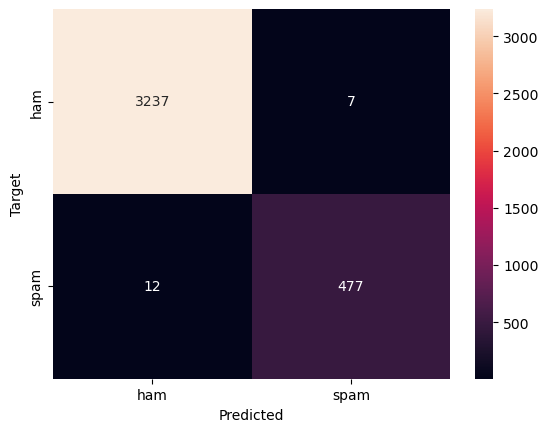

In [20]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted

# BİZ COLAAB'DE OLMADIĞIMIZ İÇİN KENDİMİZ DE YAPABİLİRİZ GLB
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes) #PD DATAFRAME'E ÇEVİRİYO
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target") #BU LABEL'LAR KAFA KARIŞTIRICI DEĞİL Mİ YA

plot_cm(cm)

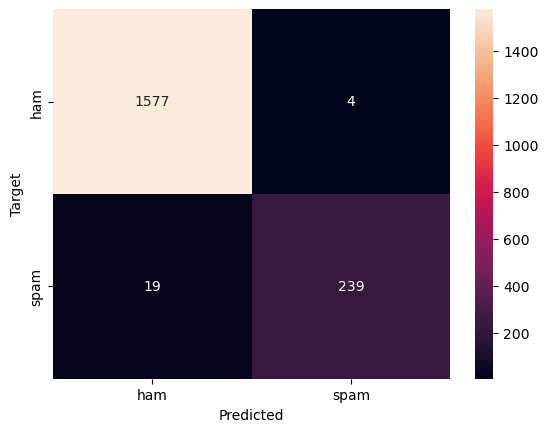

In [21]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [23]:
pip install wordcloud #this library will allow us to visualize most common words from each class

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

In [32]:
# visualize the data

#A FUNCTİON called visualize, more frequent words will appear larger and less freq words smaller
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
    


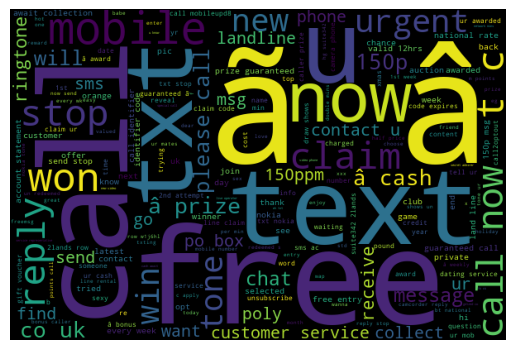

In [33]:
visualize("spam")

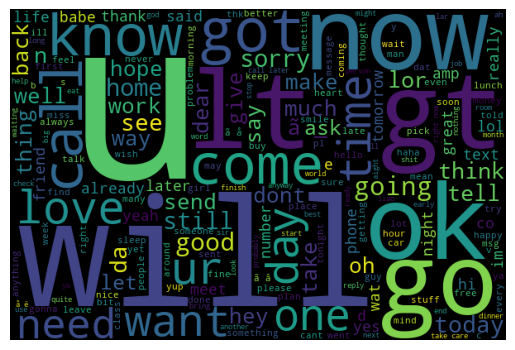

In [34]:
visualize("ham")

In [28]:
# see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [29]:
# things that should be spam but false negative
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, ÃÂ£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx CallsÃÂ£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Cal

In [30]:
# things that should not be spam : false positive
# perhaps some are mislabeled?
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Yes:)from last week itself i'm taking live call.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
